# Lektion 13

In [46]:
from sympy import *
init_printing()
import numpy as np

# Zufallsvariable

In [3]:
from sympy.stats import *

In [4]:
X = DiscreteUniform('X', range(16))
X

In [43]:
E(X**2)

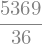

In [44]:
variance(X**2)

In [9]:
sample(X)

In [42]:
l = []
for j in range(10000):
    l.append(sample(X))

# dasselbe in numpy

In [51]:
np.random.choice(np.arange(16), 10)

array([6, 3, 8, 7, 4, 0, 7, 3, 3, 9])

In [56]:
zv = np.random.choice(np.arange(16), 10000)

Was ist der Unterschied?

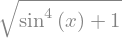

In [53]:
x = S('x')
f = sqrt(1+sin(x)**4)
f

In [60]:
fn = lambdify(x, f)  # "numpy" ist default, wenn es installiert ist

In [61]:
fn(0)

In [62]:
fn(zv)  

array([1.399324  , 1.1524073 , 1.        , ..., 1.41419971, 1.01432055,
       1.        ])

Was passiert hier?

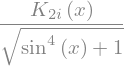

In [64]:
g = besselk(2*I, x) / f
g

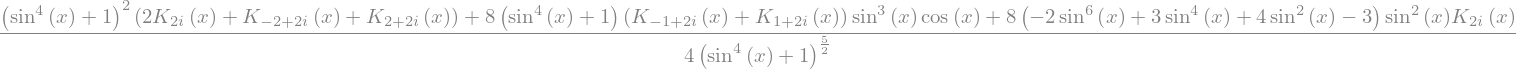

In [67]:
ddg = g.diff(x, 2).simplify()
ddg

In [69]:
ddgn = lambdify(x, ddg)

In [70]:
ddgn(1)

TypeError: ufunc 'kv' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [71]:
ddgn = lambdify(x, ddg, modules=['scipy', 'numpy', 'mpmath'])

In [72]:
ddgn(1)

mpc(real='-0.1946345572600218', imag='0.0')

In [74]:
# ddgn(zv)   # TypeError

`mpmath` beherrscht keine ufuncs

# Ausgabe in anderen Programmiersprachen

Gesetzt den Fall, Sie haben eine Fortran-Bibliothek, die komplexe Besselfunktionen beherrscht:

In [76]:
print(fcode(f))

      sqrt(sin(x)**4 + 1)


In [78]:
print(fcode(ddg))

C     Not supported in Fortran:
C     besselk
C     besselk
C     besselk
C     besselk
C     besselk
      (1.0d0/4.0d0)*((sin(x)**4 + 1)**2*(2*besselk(2.0*I, x) + besselk(
     @ -2.0 + 2.0*I, x) + besselk(2.0 + 2.0*I, x)) + 8*(sin(x)**4 + 1)*(
     @ besselk(-1.0 + 2.0*I, x) + besselk(1.0 + 2.0*I, x))*sin(x)**3*cos
     @ (x) + 8*(-2*sin(x)**6 + 3*sin(x)**4 + 4*sin(x)**2 - 3)*sin(x)**2*
     @ besselk(2.0*I, x))/(sin(x)**4 + 1)**(5.0d0/2.0d0)


In [90]:
fc = fcode(ddg, user_functions={'besselk': 'my_lib_Kv'}, assign_to='res', standard=95)
print(fc)

      res = (1.0d0/4.0d0)*((sin(x)**4 + 1)**2*(2*my_lib_Kv(cmplx(0,2.0d0
     @ ), x) + my_lib_Kv(cmplx(-2.0d0,2.0d0), x) + my_lib_Kv(cmplx(2.0d0
     @ ,2.0d0), x)) + 8*(sin(x)**4 + 1)*(my_lib_Kv(cmplx(-1.0d0,2.0d0),
     @ x) + my_lib_Kv(cmplx(1.0d0,2.0d0), x))*sin(x)**3*cos(x) + 8*(-2*
     @ sin(x)**6 + 3*sin(x)**4 + 4*sin(x)**2 - 3)*sin(x)**2*my_lib_Kv(
     @ cmplx(0,2.0d0), x))/(sin(x)**4 + 1)**(5.0d0/2.0d0)


In [94]:
cc = cxxcode(ddg)
print(cc)

// Not supported in C++:
// besselk
// besselk
// besselk
// besselk
// besselk
(1.0/4.0)*(std::pow(std::pow(std::sin(x), 4) + 1, 2)*(2*besselk(2*I, x) + besselk(-2 + 2*I, x) + besselk(2 + 2*I, x)) + 8*(std::pow(std::sin(x), 4) + 1)*(besselk(-1 + 2*I, x) + besselk(1 + 2*I, x))*std::pow(std::sin(x), 3)*std::cos(x) + 8*(-2*std::pow(std::sin(x), 6) + 3*std::pow(std::sin(x), 4) + 4*std::pow(std::sin(x), 2) - 3)*std::pow(std::sin(x), 2)*besselk(2*I, x))/std::pow(std::pow(std::sin(x), 4) + 1, 5.0/2.0)


# Pattern matching 

In [95]:
x = Symbol('x')
w = Wild('w')   #  wildcard

In [96]:
pattern = sin(w)

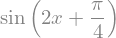

In [97]:
a = sin(2*x+pi/4)
a

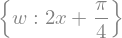

In [101]:
m = a.match(pattern)
m

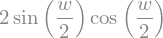

In [99]:
b = 2*sin(w/2)*cos(w/2)
b

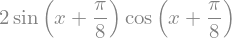

In [102]:
b.subs(m)

In [103]:
def expand_sin_x_halbe(term):
    x1 = Wild('w')
    pattern = sin(w)
    ersetzung = 2*sin(w/2)*cos(w/2)
    m = term.match(pattern)
    if m:
        return ersetzung.subs(m)
    else:
        return term

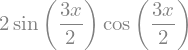

In [104]:
expand_sin_x_halbe(sin(3*x))

In [107]:
f = sin(3*x+19)
(expand_sin_x_halbe(f)-f).simplify()

In [109]:
f = 3*sin(x)
expand_sin_x_halbe(f)

In [110]:
type(f)

sympy.core.mul.Mul

In [111]:
f.args

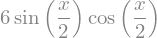

In [112]:
expand_sin_x_halbe(f.args[0]) * expand_sin_x_halbe(f.args[1])

In [114]:
def expand_sin_x_halbe(ausdr):
    ausdr = S(ausdr)
    w = Wild('w')
    pattern = sin(w)
    ersetzung = 2*sin(w/2)*cos(w/2)
    m = ausdr.match(pattern)
    if m:
        res = ersetzung.subs(m)
    elif ausdr.is_Mul:
        res = 1
        for term in ausdr.args:
            res = res * expand_sin_x_halbe(term)
    elif ausdr.is_Add:
        res = 0
        for term in ausdr.args:
            res = res + expand_sin_x_halbe(term)
    else:
        res = ausdr
    return res

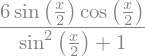

In [115]:
expand_sin_x_halbe(3*sin(x)/(1+sin(x/2)**2))

In [116]:
def expand_sin_x_halbe(ausdr):
    ausdr = S(ausdr)
    w = Wild('w')
    pattern = sin(w)
    ersetzung = 2*sin(w/2)*cos(w/2)
    m = ausdr.match(pattern)
    if m:
        res = ersetzung.subs(m)
    elif ausdr.is_Mul:
        res = 1
        for term in ausdr.args:
            res = res * expand_sin_x_halbe(term)
    elif ausdr.is_Add:
        res = 0
        for term in ausdr.args:
            res = res + expand_sin_x_halbe(term)
    elif ausdr.is_Pow:
        res = expand_sin_x_halbe(ausdr.args[0]) ** expand_sin_x_halbe(ausdr.args[1])
    else:
        res = ausdr
    return res

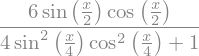

In [117]:
expand_sin_x_halbe(3*sin(x)/(1+sin(x/2)**2))

In [118]:
expand_sin_x_halbe(exp(sin(x)))

In [124]:
x,y,z = symbols('x y z')
a = x + y + z

In [126]:
a.func
a.args

In [129]:
a.func

sympy.core.add.Add

In [135]:
a.func(*a.args)

In [165]:
def expand_sin_x_halbe(ausdr):
    ausdr = S(ausdr)
    w = Wild('w')
    pattern = sin(w)
    ersetzung = 2*sin(w/2)*cos(w/2)
    m = ausdr.match(pattern)
    if m:
        res = ersetzung.subs(m)
    else:
        try:
            f = ausdr.func
        except AttributeError:
            res = ausdr
        args = ausdr.args
        if len(args) == 0:
            res = ausdr
        else:
            liste = []
            for l in args:
                liste.append(expand_sin_x_halbe(l))
            print(ausdr, liste)
            res = f(*liste)
    return res

2*sin(x/2) [2, 2*sin(x/4)*cos(x/4)]


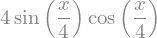

In [166]:
expand_sin_x_halbe(2*sin(x/2))

In [167]:
expand_sin_x_halbe(exp(sin(x)))

exp(sin(x)) [2*sin(x/2)*cos(x/2)]


In [158]:
f.func

AttributeError: 'int' object has no attribute 'func'

In [156]:
len(f.args) 